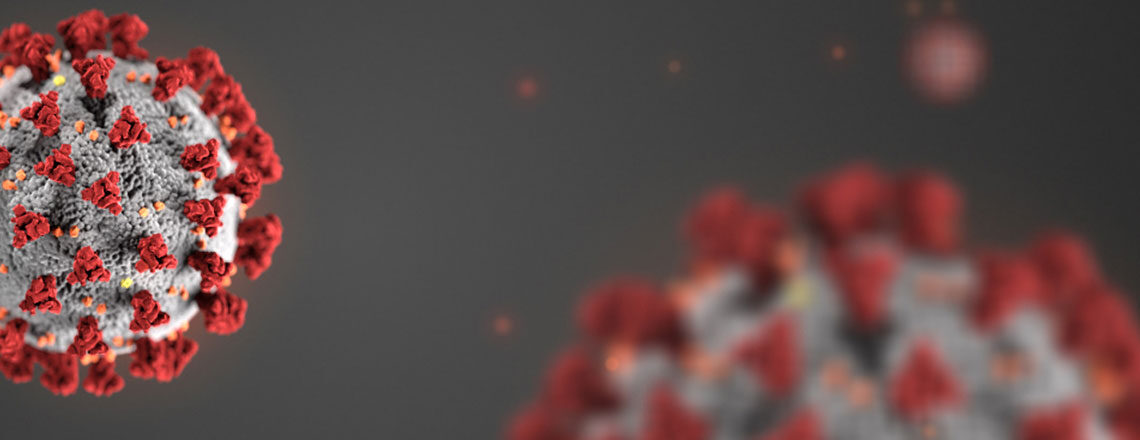

 # San Diego County COVID-19



## Analyzing San Diego Coronavirus cases 

On February 11, 2020 the World Health Organization announced an official name for the disease that is causing the 2019 novel coronavirus outbreak, first identified in Wuhan China. The new name of this disease is coronavirus disease 2019, abbreviated as COVID-19. In COVID-19, ‘CO’ stands for ‘corona,’ ‘VI’ for ‘virus,’ and ‘D’ for disease. Formerly, this disease was referred to as “2019 novel coronavirus” or “2019-nCoV”.

Coronavirus continues to grow in San Diego County, California. Pandemic has shut down or significantly altered most of the economy, testing the resilience of all San Diegans. Necessary public health measures to prevent the spread of the virus have halted tourism, shuttered restaurants and bars, forced many to work from home, severly limited most businesses from. interacting with their customers, and caused unemployment and uncertainty for tens of thousands in the San Diego region.

This project uses https://sdgis-sandag.opendata.arcgis.com/datasets/covid-19-statistics-by-zip-code?geometry=-120.818%2C32.167%2C-112.908%2C33.780

# Imports and Datasets
Pandas - for dataset handling

Numpy - Support for Panda and Calculations

Matplotlib - Library for visualizations

Seaborn - Library for plot graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import statsmodels.api as sm
from sklearn import  linear_model
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import weibull_min, lognorm, logistic, norm
from scipy.optimize import curve_fit
from scipy.special import erf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse



What we actually know?

- There are 44,925 confirmed cases in San Diego county, and 760 reported deaths

- There are 790,729 confirmed cases in California and 15,071 reported deaths

- Covid-19 has had a significant impact on San Diego workforce, with unemployment rate of 14.7%, the highest since the Great Recesion in 2009-10, leaving 242,000 San Diegans out of work since March 2020

- The most affected areas are Bario Logan with unemployment rate of 18.9%, and areas like Golden Hill, City Heights, College Area, San Ysidro, Vista, National City and Oceanside all reported unemployment rate of 15.7% or higher

- The zipcodes least affected with unemployment rate just under 12% are Carmel Valley, Del Mar, Rancho Santa Fe, Chula Vista NE, and Rancho Bernardo.

# Datasets

Data is from March 2020 to till date


In [2]:
stats_df = pd.read_csv('COVID_19_Statistics_San_Diego_County.csv')
zip_df = pd.read_csv('COVID-19_Statistics_by_ZIP_Code.csv')

In [3]:
stats_df.head()

,X,Y,objectid,date,tests,positives,hospitalized,icu,deaths,newcases,...,age80_plus,ageunknow,age20_29,genderfemale,gendermale,gendeunk,age30_39,globalid,newtests,rolling_perc_pos_cases
0,-1.299488e+07,3.899796e+06,59,2020/03/11 08:00:00+00,123.0,5,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{78698F35-A6E9-48CB-8C8D-67A70EC15C1D},NaN,NaN
1,-1.299488e+07,3.899796e+06,60,2020/03/12 08:00:00+00,147.0,10,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{EFA2B0DB-A692-4632-8495-14B46E240096},NaN,NaN
2,-1.299488e+07,3.899796e+06,61,2020/03/13 08:00:00+00,273.0,19,NaN,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{AA7DF18A-6303-4758-A5F1-9B9CD4388A92},52.0,NaN
3,-1.299488e+07,3.899796e+06,62,2020/03/14 08:00:00+00,288.0,25,12.0,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{9A014068-714D-4FD4-B011-A16A1A49C07C},14.0,NaN
4,-1.299488e+07,3.899796e+06,63,2020/03/15 08:00:00+00,313.0,37,10.0,NaN,NaN,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{DA54D0B2-3C90-4FF2-8090-BE3BDB8C1B4E},25.0,NaN


In [4]:
zip_df.head()

,X,Y,objectid,zipcode_zip,ziptext,case_count,updatedate,created_user,created_date,last_edited_user,last_edited_date,globalid,rate_100k,test_positive,test_neg,test_ind,test_total,test_100k,tests_pct_positive
0,-1.299049e+07,3.869543e+06,1,91901.0,91901,1.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{87C2AEFB-2AB8-473D-BE60-B021F0AD990A},NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.302606e+07,3.851793e+06,2,91902.0,91902,9.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{0BBF31F5-A98F-4A42-869E-F425379D6BA8},NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.303169e+07,3.847143e+06,3,91910.0,91910,23.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{94FEB6AB-AB77-4534-9692-CF8DFC823461},NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.302997e+07,3.843296e+06,4,91911.0,91911,21.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{83793CC0-427A-4747-9BDD-5D79A947C3FF},NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.302299e+07,3.844480e+06,5,91913.0,91913,20.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{597D4C08-7AD1-49D2-811D-D54EE7C2BB13},NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   X                       174 non-null    float64
 1   Y                       174 non-null    float64
 2   objectid                174 non-null    int64  
 3   date                    174 non-null    object 
 4   tests                   170 non-null    float64
 5   positives               174 non-null    int64  
 6   hospitalized            171 non-null    float64
 7   icu                     165 non-null    float64
 8   deaths                  164 non-null    float64
 9   newcases                174 non-null    int64  
 10  age_9                   156 non-null    float64
 11  age10_19                156 non-null    float64
 12  age40_49                156 non-null    float64
 13  age50_59                156 non-null    float64
 14  age60_69                156 non-null    fl

In [6]:
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16896 entries, 0 to 16895
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X                   16896 non-null  float64
 1   Y                   16896 non-null  float64
 2   objectid            16896 non-null  int64  
 3   zipcode_zip         13701 non-null  float64
 4   ziptext             16896 non-null  int64  
 5   case_count          14993 non-null  float64
 6   updatedate          16896 non-null  object 
 7   created_user        1642 non-null   object 
 8   created_date        1642 non-null   object 
 9   last_edited_user    1642 non-null   object 
 10  last_edited_date    1642 non-null   object 
 11  globalid            16896 non-null  object 
 12  rate_100k           5222 non-null   float64
 13  test_positive       113 non-null    float64
 14  test_neg            113 non-null    float64
 15  test_ind            113 non-null    float64
 16  test

# Cleaning Data



In [7]:
df = stats_df[['date','tests','positives','hospitalized','icu','deaths']].sort_values('date')
df['date'] = pd.to_datetime(df.date)

df.columns = ['date', 'tests', 'cases', 'hosp','icu', 'deaths']
df['date'] = pd.to_datetime(df.date)
start_date = df.iloc[0].date
start_cases = df.iloc[0].cases
df['day'] = (df.date - start_date).dt.days

df['new_cases'] = df.cases.diff()
df['cases_rate'] = df.cases.diff()/ df.cases.shift(1)
df['cases_smooth'] = lowess(df.cases, df.day)[:,1]
df['cases_smooth_rate'] = df.cases_smooth.diff()/df.cases_smooth.shift(1)

df['new_hosp'] = df.hosp.diff()
df['hosp_rate'] = df.hosp.diff()/ df.hosp.shift(1)
df['hosp_smooth'] = lowess(df.hosp.fillna(0), df.day)[:,1]
df['hosp_smooth_rate'] = df.hosp.diff()/df.hosp_smooth.shift(1)

df['new_deaths'] = df.deaths.diff()
df['deaths_rate'] = df.deaths.diff()/ df.deaths.shift(1)
df['deaths_smooth'] = lowess(df.deaths.fillna(0), df.day)[:,1]
df['deaths_smooth_rate'] = df.deaths_smooth.diff()/df.deaths_smooth.shift(1)

#df['double_days'] = np.log(2)/np.log(1+df.cases_smooth_rate)


df.tail()

,date,tests,cases,hosp,icu,deaths,day,new_cases,cases_rate,cases_smooth,cases_smooth_rate,new_hosp,hosp_rate,hosp_smooth,hosp_smooth_rate,new_deaths,deaths_rate,deaths_smooth,deaths_smooth_rate
169,2020-08-23 08:00:00+00:00,784836.0,36727,2989.0,733.0,660.0,169,187.0,0.005118,37148.127663,0.009829,11.0,0.003694,3004.591718,0.003687,0.0,0.000000,664.149246,0.007631
170,2020-08-24 08:00:00+00:00,790370.0,36994,3006.0,736.0,665.0,170,267.0,0.007270,37509.879529,0.009738,17.0,0.005688,3026.083747,0.005658,5.0,0.007576,669.180804,0.007576
171,2020-08-25 08:00:00+00:00,798697.0,37222,3022.0,738.0,668.0,171,228.0,0.006163,37871.784955,0.009648,16.0,0.005323,3047.584905,0.005287,3.0,0.004511,674.214090,0.007522
172,2020-08-26 08:00:00+00:00,803932.0,37499,3040.0,738.0,673.0,172,277.0,0.007442,38233.831303,0.009560,18.0,0.005956,3069.094654,0.005906,5.0,0.007485,679.248982,0.007468
173,2020-08-27 08:00:00+00:00,812753.0,37784,3065.0,146.0,676.0,173,285.0,0.007600,38596.007148,0.009473,25.0,0.008224,3090.612505,0.008146,3.0,0.004458,684.285368,0.007415


In [8]:
df.set_index('date').cases_rate.tail(15)

date
2020-08-13 08:00:00+00:00    0.012062
2020-08-14 08:00:00+00:00    0.008190
2020-08-15 08:00:00+00:00    0.009725
2020-08-16 08:00:00+00:00    0.008132
2020-08-17 08:00:00+00:00    0.005778
2020-08-18 08:00:00+00:00    0.006086
2020-08-19 08:00:00+00:00    0.006558
2020-08-20 08:00:00+00:00    0.008537
2020-08-21 08:00:00+00:00    0.008103
2020-08-22 08:00:00+00:00    0.009309
2020-08-23 08:00:00+00:00    0.005118
2020-08-24 08:00:00+00:00    0.007270
2020-08-25 08:00:00+00:00    0.006163
2020-08-26 08:00:00+00:00    0.007442
2020-08-27 08:00:00+00:00    0.007600
Name: cases_rate, dtype: float64

# Data Exploration

- We start with Geo Analysis of San Diego County zip codes and confirmed case counts to observe the spread of Covid-19


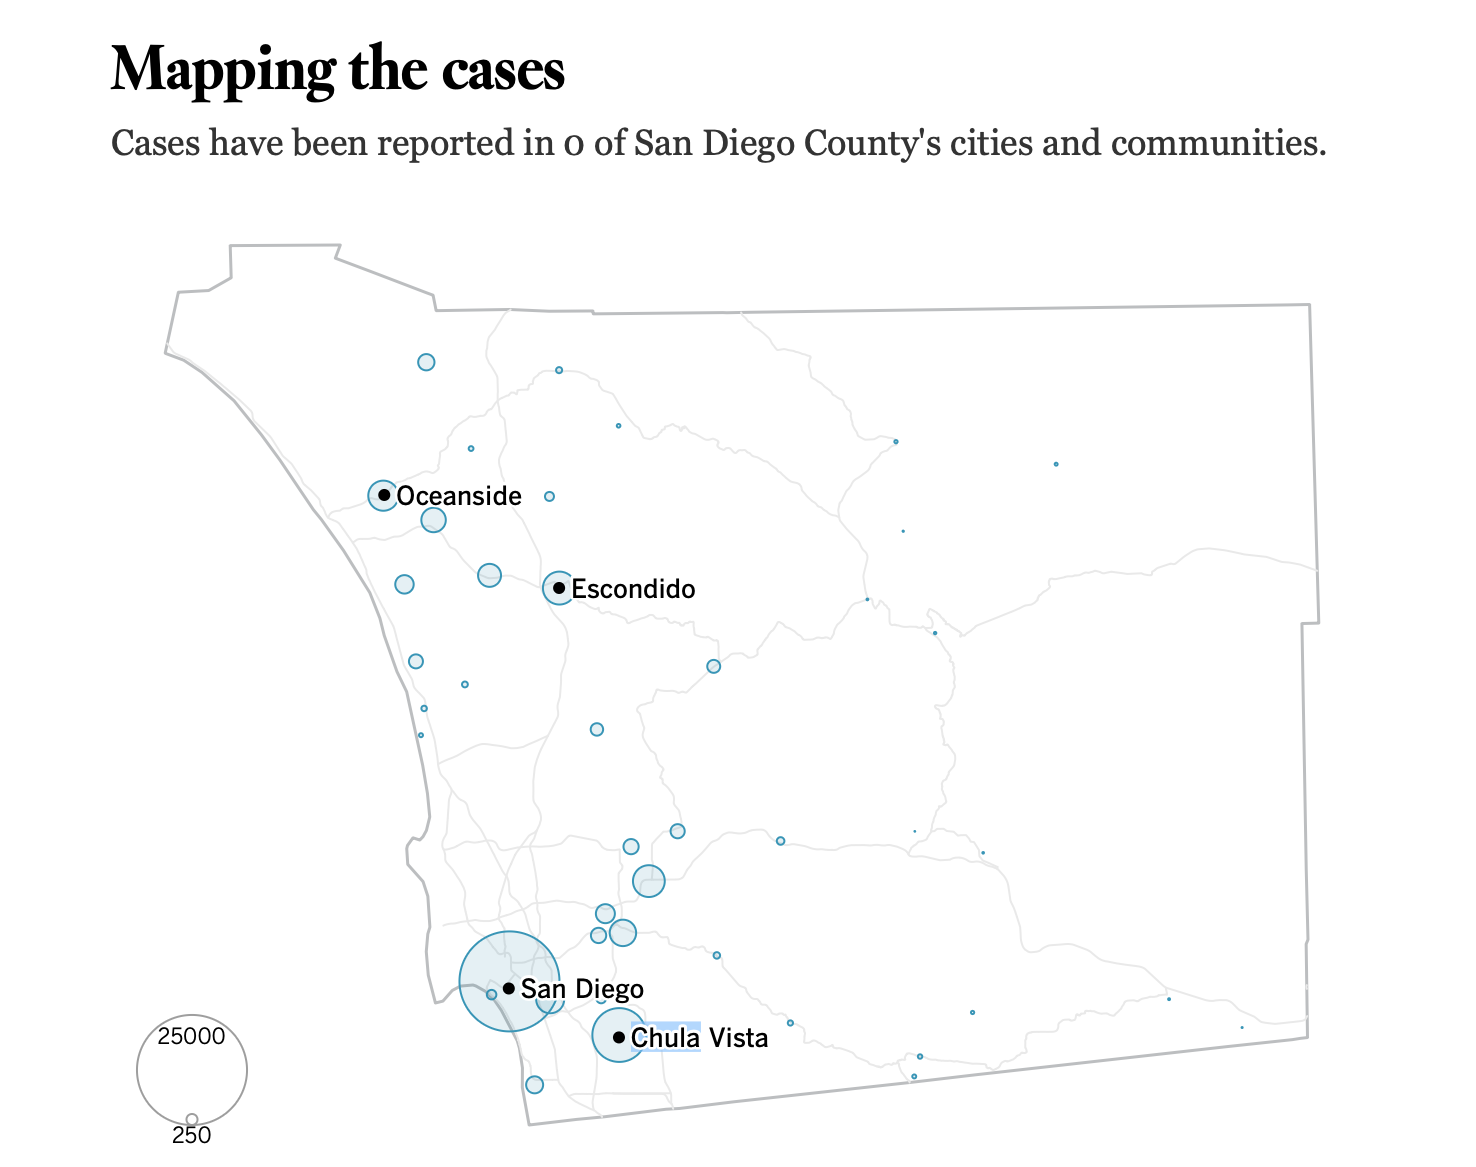

Insights

- The most affected zipcodes are Downtown San Diego and South San Diego

### Top 10 Areas with Highest Case Count

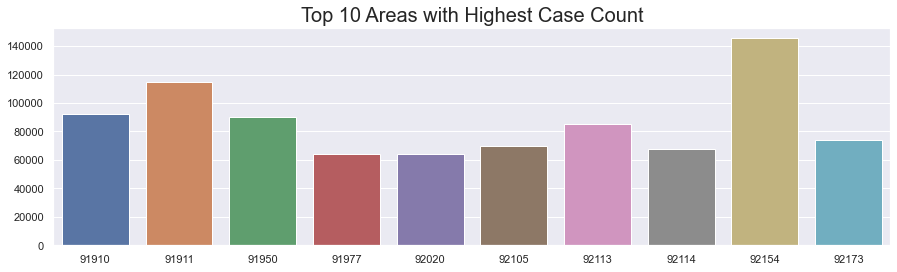

In [31]:
codes = list(set(zip_df['ziptext'].to_list()))
code_counts = {}
for code in codes:
    n_df = zip_df[zip_df['ziptext'] == code]
    code_counts[code] = n_df['case_count'].sum()

sorted_counts = {k: v for k, v in sorted(code_counts.items(), key=lambda item: item[1])}
top10_case_counts = [sorted_counts[k] for k in list(sorted_counts.keys())[-10:]]
top10_codes = [k for k in list(sorted_counts.keys())[-10:]]

sns.barplot(y=top10_case_counts, x=top10_codes)
plt.title('Top 10 Areas with Highest Case Count',fontsize=20)

plt.show()

Insights:

- This bar plot confirms what we saw on the map; zip code Imperial Beach has the highest case count, then is Chula Vista, Bonita, National City and El Cajon

- The most affected areas are close to the US-Mexico border, they have the highest unemployment rate due to Covid-19, and are mostly Lationo neighborhoods

### Statistical Analysis

### Box Plots

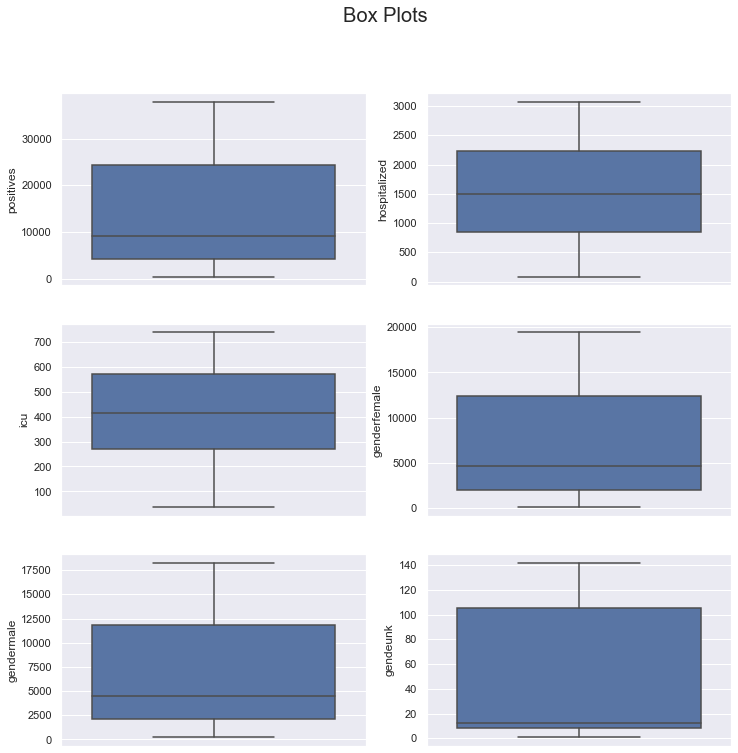

In [14]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

sns.boxplot(y=stats_df["positives"], ax=axes[0,0])

sns.boxplot(y=stats_df["hospitalized"], ax=axes[0,1])


sns.boxplot(y=stats_df["icu"], ax=axes[1,0])


sns.boxplot(y=stats_df["genderfemale"], ax=axes[1,1])


sns.boxplot(y=stats_df["gendermale"], ax=axes[2,0])


sns.boxplot(y=stats_df["gendeunk"], ax=axes[2,1])

figure.suptitle("Box Plots", fontsize=20)
plt.show()

In [15]:
Q1 = stats_df[['positives','deaths', 'hospitalized', 'icu', 'genderfemale', 'gendermale', 'gendeunk']].quantile(0.25); print(Q1)
Q3 = stats_df[['positives','deaths', 'hospitalized', 'icu', 'genderfemale', 'gendermale', 'gendeunk']].quantile(0.75); print(Q3)
IQR = Q3-Q1;print(IQR)

positives       4090.0
deaths           147.0
hospitalized     853.0
icu              268.5
genderfemale    2006.5
gendermale      2077.0
gendeunk           8.0
Name: 0.25, dtype: float64
positives       24327.5
deaths            482.5
hospitalized     2226.0
icu               573.0
genderfemale    12416.0
gendermale      11823.5
gendeunk          105.0
Name: 0.75, dtype: float64
positives       20237.5
deaths            335.5
hospitalized     1373.0
icu               304.5
genderfemale    10409.5
gendermale       9746.5
gendeunk           97.0
dtype: float64


In [32]:
#remove  outliers
lower_bound = Q1 -(1.5 * IQR)
upper_bound = Q3 +(1.5 * IQR)
stats_tr = stats_df[~((stats_df[['positives','deaths', 'hospitalized', 'icu', 'genderfemale', 'gendermale', 'gendeunk']] < lower_bound) |(stats_df[['positives','deaths', 'hospitalized', 'icu', 'genderfemale', 'gendermale', 'gendeunk']] > upper_bound)).any(axis=1)]

In [17]:
stats_tr.shape

(155, 26)

In [19]:
print(lower_bound)
print(upper_bound)

positives      -26266.25
deaths           -356.25
hospitalized    -1206.50
icu              -188.25
genderfemale   -13607.75
gendermale     -12542.75
gendeunk         -137.50
dtype: float64
positives       54683.75
deaths            985.75
hospitalized     4285.50
icu              1029.75
genderfemale    28030.25
gendermale      26443.25
gendeunk          250.50
dtype: float64


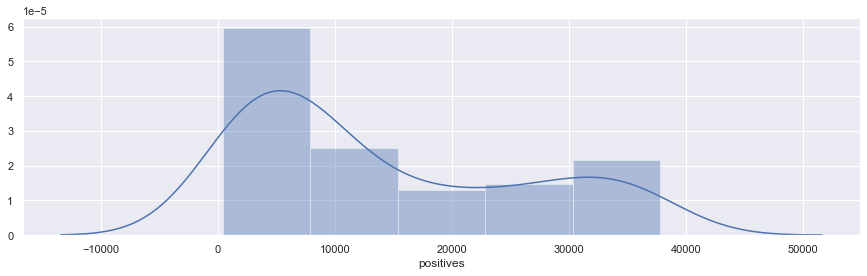

In [18]:
sns.distplot(stats_tr['positives'])

### Age vs Cases

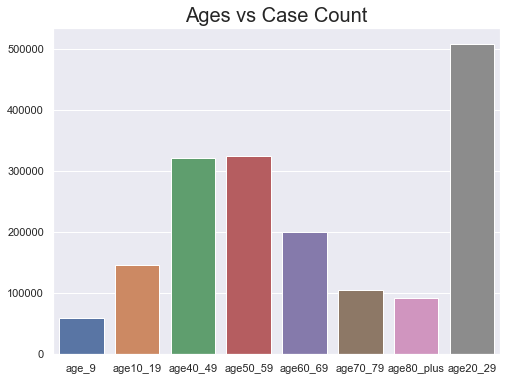

In [20]:
ages = ['age_9','age10_19','age40_49','age50_59','age60_69','age70_79','age80_plus','age20_29',]
age_count = []
for age in ages:
    age_count.append(stats_df[age].sum())
plt.figure(figsize=(8,6))
sns.barplot(y=age_count, x=ages)
plt.title('Ages vs Case Count', fontsize=20)
plt.show()

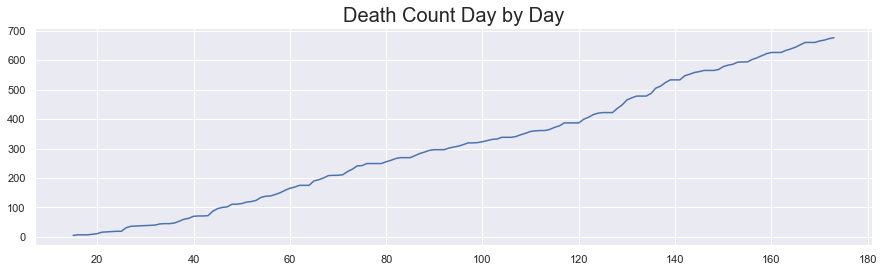

In [21]:
stats_df['deaths'].plot()
plt.title('Death Count Day by Day', fontsize=20)
plt.show()

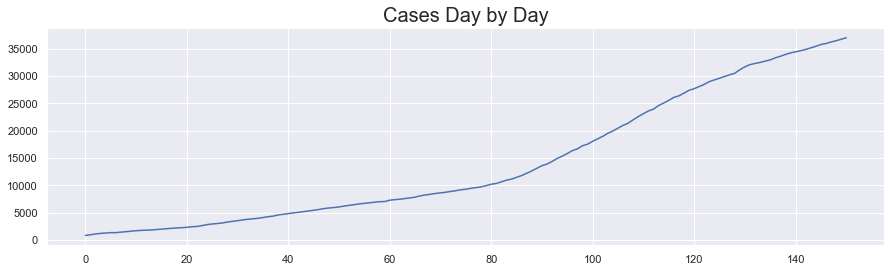

In [34]:
sns.lineplot(y=counts, x=np.arange(len(dates)))
plt.title('Cases Day by Day', fontsize=20)
plt.show()

## Insights:
 
From the previous graphs we observe the following trends:


- At the begining of March, 5 positive cases were reported in San Diego county
- By April number grew to 1000, in May it was 5000, June 10,000, and it kept growing
- Virus transmition is rates as 'Substantial' and places the area in Tier 2 and keeps some nonessential businesses closed
- Young adults in their 20s and 30s make the largest group of coronavirus cases
- Median age when it comes to cases is 36, and 78 for deaths
- Over the last week, County has averaged 291 new cases and 3.7 deaths a day
- The number of cases is doubling every 100 days
- Over the last few weeks, there are 62 deaths per 100,000 residents

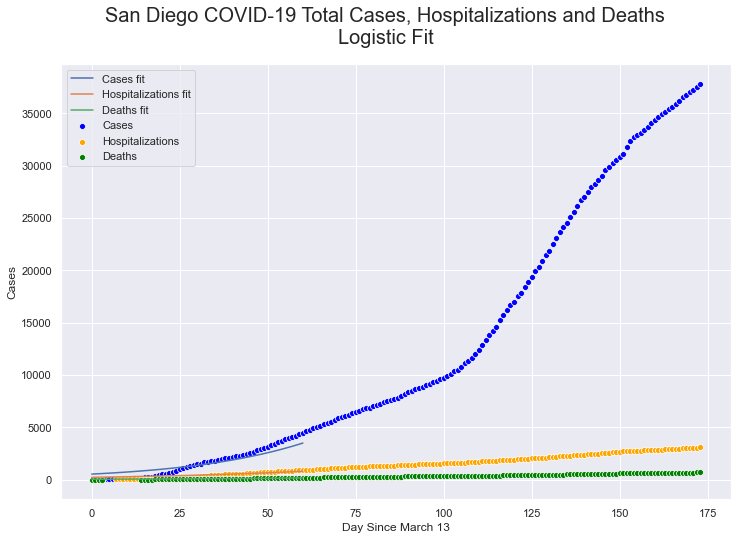

In [35]:
def tc_plot(ax, fit_func):

    t = df.dropna(subset=['day','cases','hosp', 'deaths']).copy()

    x = np.linspace(0,60)

    popt, pcov = curve_fit(fit_func, t.day, t.cases, p0=fit_func.popt, absolute_sigma = True)
    fitted = fit_func(x, *popt)
    sns.lineplot(x, fitted, label='Cases fit')
    sns.scatterplot(df.day, df.cases, ax=ax, color='blue', label='Cases')    
    #print(f"C Mean={round(popt[0])}, R^2={r2_score(df.cases, fitted[:len(df.cases)])}")

    popt, pcov = curve_fit(fit_func, t.day, t.hosp,popt, absolute_sigma = True)
    fitted = fit_func(x, *popt)
    sns.lineplot(x, fitted, label='Hospitalizations fit')
    sns.scatterplot(df.day, df.hosp,  ax=ax, color='orange', label='Hospitalizations')
    #print(f"H Mean={round(popt[0])}, R^2={r2_score(df.hosp.fillna(0), fitted[:len(df.hosp)])}")

    popt, pcov = curve_fit(fit_func, t.day, t.deaths,popt, absolute_sigma = True)
    fitted = fit_func(x, *popt)
    sns.lineplot(x, fitted, label='Deaths fit')
    #sns.lineplot(x=df.day, y=df.deaths_smooth, ax=ax, label='Deaths')   
    sns.scatterplot(t.day, t.deaths+1, ax=ax, color='green', label='Deaths')
    #print(f"D Mean={round(popt[0])}, R^2={r2_score(df.deaths.fillna(0), fitted[:len(df.deaths)])}")

    
fig, ax = plt.subplots(figsize=(12,8))   
tc_plot(ax, func_logistic)
ax.set_ylabel('Cases')
ax.set_xlabel('Day Since March 13')
fig.suptitle("San Diego COVID-19 Total Cases, Hospitalizations and Deaths\nLogistic Fit", fontsize=20);

### Correlation b/w Age ,  Positives and New Cases

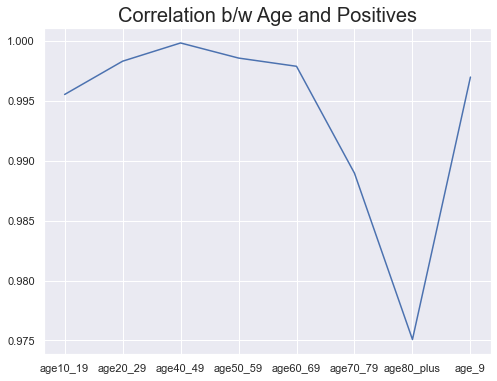

In [24]:
positives = []
newcases = []
for age in ages:
    positives.append(stats_df['positives'].corr(stats_df[age]))
    newcases.append(stats_df['newcases'].corr(stats_df[age]))
plt.figure(figsize=(8,6))

sns.lineplot(y=positives, x=ages)
plt.title('Correlation b/w Age and Positives', fontsize=20)
plt.show()

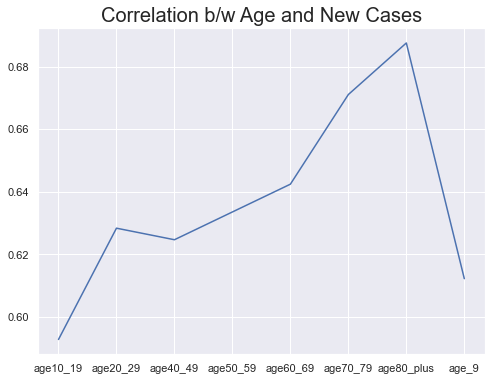

In [25]:
plt.figure(figsize=(8,6))
sns.lineplot(y=newcases, x=ages)
plt.title('Correlation b/w Age and New Cases', fontsize=20)
plt.show()

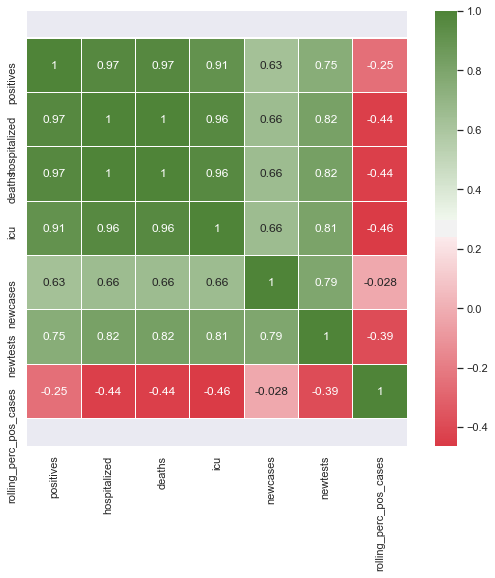

In [38]:
filt = ['positives','hospitalized', 'deaths', 'icu',
       'newcases', 'newtests',
       'rolling_perc_pos_cases']
stats_df = stats_df[filt]

fig, ax = plt.subplots(figsize=(10, 8))
dfcorr = stats_df[filt].corr()

dfheatmap = sns.heatmap(dfcorr, cmap=sns.diverging_palette(10, 120, as_cmap=True), linewidths=.1, annot=True, square=True, ax=ax)

bottom, top = dfheatmap.get_ylim()
dfheatmap.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

## Insights:

- Total of 3,418 patients were hospitalized
- 7.6% total cases requires hispitalization and 1.8% required ICU
- County is still in 5-8% positive tests, and 4-7 daily cases per 100k residents

In [26]:
t = pd.Timestamp('2020-03-13', freq='D') 
t + t.freq*42

Timestamp('2020-04-24 00:00:00', freq='D')

In [29]:
def func_logpdf(x, loc, scale, a):
    return a*logistic.pdf(x,loc, scale)
func_logpdf.popt =  (22, 10, 3659)

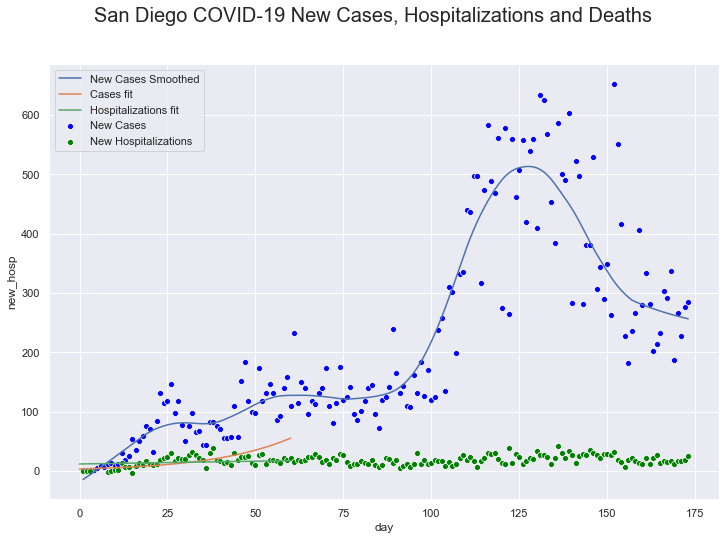

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("San Diego COVID-19 New Cases, Hospitalizations and Deaths", fontsize=20);

def nc_plot(df, pct_cases=None, cases_only=False):
    # Fit a normal PDF

    fit_func = func_logpdf or fit_func

    if pct_cases:
        df = df.iloc[:int(pct_cases*len(df))]
    
    t = df.dropna(subset=['day','new_cases','new_hosp']).copy()


    x = np.linspace(0,60)

    sns.scatterplot(df.day, df.new_cases, ax=ax, color='blue', label='New Cases')

    tdl = lowess(df.new_cases,  df.day, 0.2)
    sns.lineplot(tdl[:,0], tdl[:,1], label='New Cases Smoothed')

    popt, pcov = curve_fit(fit_func, t.day, t.new_cases, p0=fit_func.popt, absolute_sigma = True)
    fitted = fit_func(x, *popt)
    sns.lineplot(x, fitted, label='Cases fit')
    
    #if not cases_only:
    #    print(f"C: Mean={round(popt[0])}, R^2={r2_score(df.new_cases[1:], fitted[1:len(df.new_cases)])}")
    
    if not cases_only:
        
        sns.scatterplot(df.day, df.new_hosp,  ax=ax, color='green', label='New Hospitalizations')

        popt, pcov = curve_fit(fit_func, t.day, t.new_hosp,popt, absolute_sigma = True)
        fitted = fit_func(x, *popt)
        sns.lineplot(x, fitted, label='Hospitalizations fit')

        #print(f"H: Mean={round(popt[0])}, R^2={r2_score(df.new_hosp[1:], fitted[1:len(df.new_hosp)])}")

        #popt, pcov = curve_fit(func_norm, t.day, t.new_deaths,popt, absolute_sigma = True)
        #sns.lineplot(x, func_norm(x, *popt), label='Deaths fit')  
        #sns.scatterplot(t.day, t.new_deaths, ax=ax, color='green', label='Deaths')
        #print(round(popt[0]))

        
nc_plot(df,1, cases_only=False)


## OLS Regression Model

In [10]:
stats_df = stats_df.dropna()
filt5 = ['hospitalized', 'deaths', 'icu',
       'newcases', 'newtests',
       'rolling_perc_pos_cases']
X = stats_df[filt5]

X = sm.add_constant(X)
y = stats_df['positives']
OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              positives   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2637.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):          1.00e-147
Time:                        08:08:37   Log-Likelihood:                -1311.4
No. Observations:                 155   AIC:                             2637.
Df Residuals:                     148   BIC:                             2658.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.456e+04    743.451    -19.583      0.000    -1.6e+04   -1.31e+04
hospitalized              -0.5508      2.484     -0.222      0.825      -5.459       4.358
deaths                    79.2156     10.353      7.651      0.000      58.756      99.675
icu                       -7.2551      1.860     -3.900      0.000     -10.931      -3.579
newcases                  -7.9376      1.102     -7.203      0.000     -10.115      -5.760
newtests                  -0.1422      0.073     -1.946      0.054      -0.287       0.002
rolling_perc_pos_cases  1933.2858     81.778     23.641      0.000    1771.682    2094.890
==============================================================================
Omnibus:                        2.510   Durbin-Watson:                   0.698
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.358
Skew:                           0.302   Prob(JB):                        0.308
Kurtosis:                       2.976   Cond. No.                     5.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

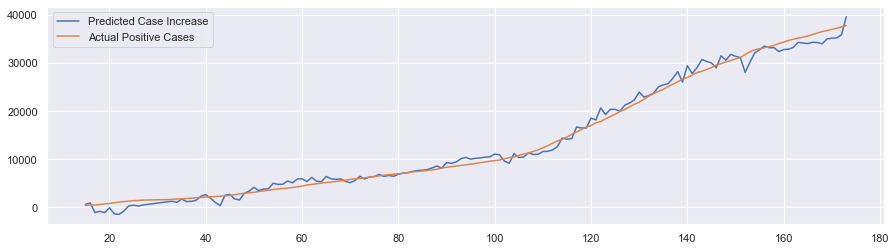

In [11]:
plt.rcParams['figure.figsize'] = (15,4)

yPrediction = OLSmodelResult.predict(X)
plt.plot(yPrediction, label='Predicted Case Increase')
plt.plot(y, label='Actual Positive Cases')

plt.legend()

plt.show()

## Conslusion:

- County is currently in 'Substential' Red Tier 2, with on average daily 6.31 cases per 100,000 residents and is still in 5-8% of positive cases
- For county to move to orange Tier 3, the cases need to lower daily positive cases to 2-3.9% and daily case count 1-3.9 per 100k and must stay at the level for at least 3 weeks before moving to less restrictive level
- For County to fully re-open businesses it needs to move to the lowest Orange Tier which reqauired less than 1 daily positive case per 100k, and less than 2% daily positive cases
- As numbers are not trening in the same direction, it seems that San Diego is headed in Purple more restricted tier

#### Variables that have negative impact on San Diego County moving to less restrictive tier
- Community outbreaks - start of semster at the SDSU reported more than 880 case since it partially reopened last month, and threatens San Diego economy recovery 
- Lack of awareness amongst young professionals 
- Large gatherings
- Nursing homes have become a tragical focal point of the coronavirus outbreak

### In order to achieve our goal of moving to the least restrictive Orange Tier, County needs to 
- Enforce protective measures - wearing mask in public, providing sanitizers in public spaces, limit indoor businesses activities and regulate operating capacities
- Stop all in-person school classes, and switch to online
- Have contact tracing apps, and have tracking professionals to identify people who have been infectious or exposed to the virus
- Develop app who would have maps that would show where are this people who are infectious/exposed to the virus
- Enforce temperature checks in big shopping malls
- Raise awarness and educate all residents